In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import activations, initializers, regularizers, constraints

In [ ]:
df = pd.read_csv("/content/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df["quality"].value_counts().sort_index()

,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


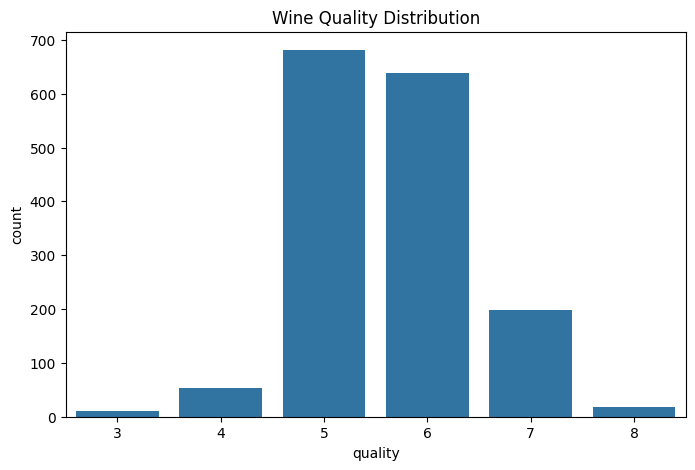

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="quality", data=df)
plt.title("Wine Quality Distribution")
plt.show()

In [ ]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


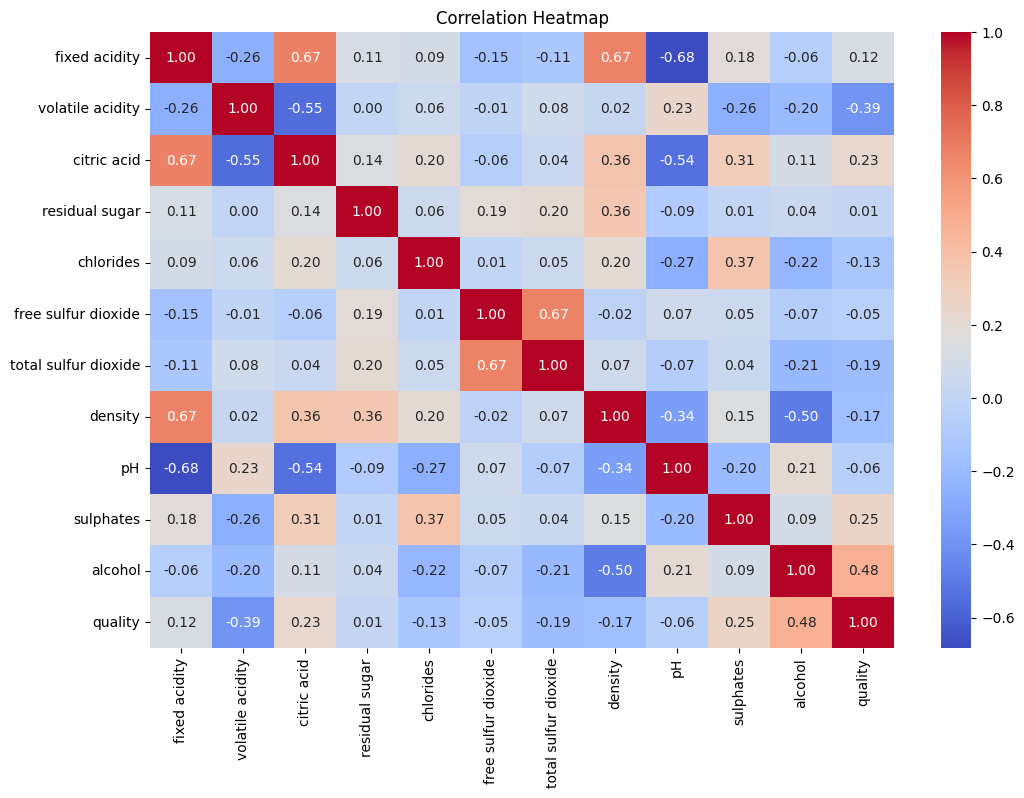

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_with_quality = corr["quality"].sort_values(ascending=False)
corr_with_quality

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


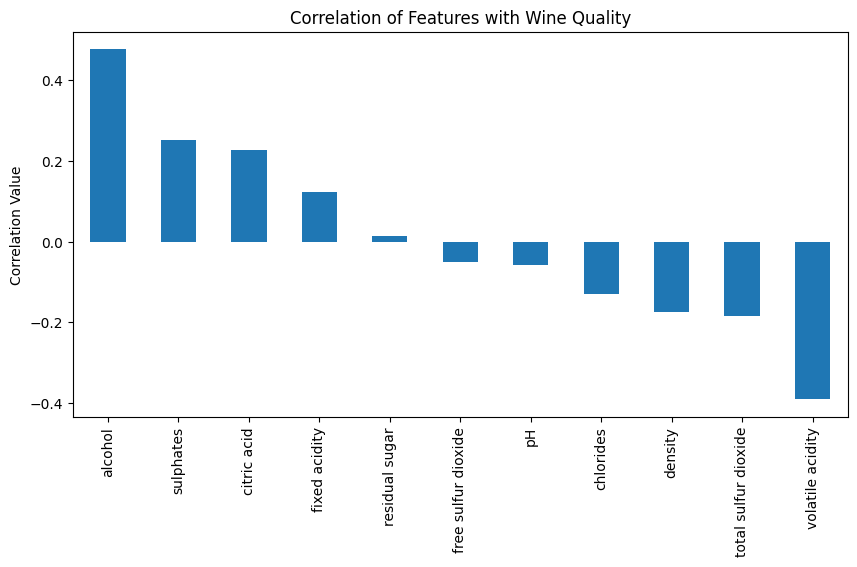

In [ ]:
plt.figure(figsize=(10,5))
corr_with_quality.drop("quality").plot(kind="bar")
plt.title("Correlation of Features with Wine Quality")
plt.ylabel("Correlation Value")
plt.show()

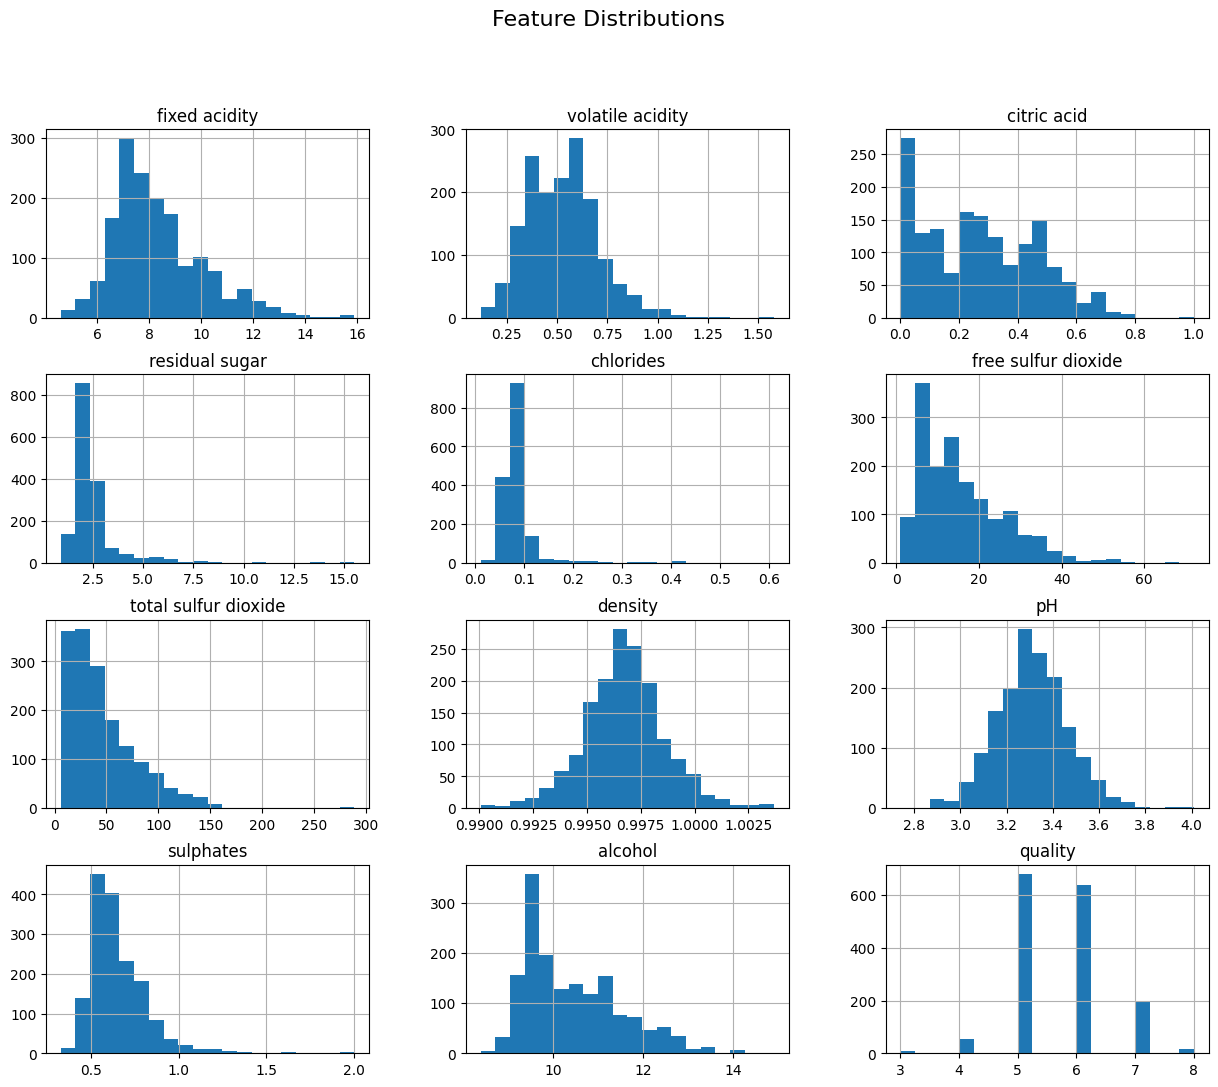

In [ ]:
df.hist(figsize=(15,12), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

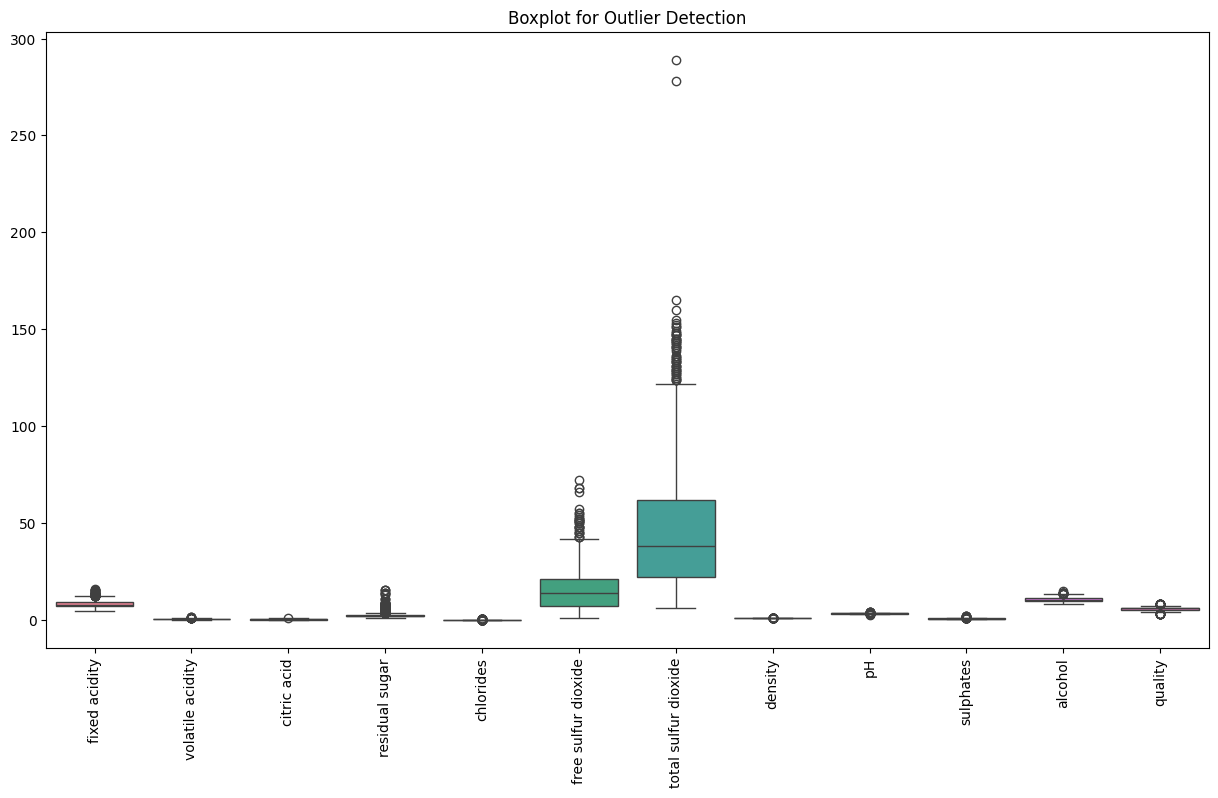

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

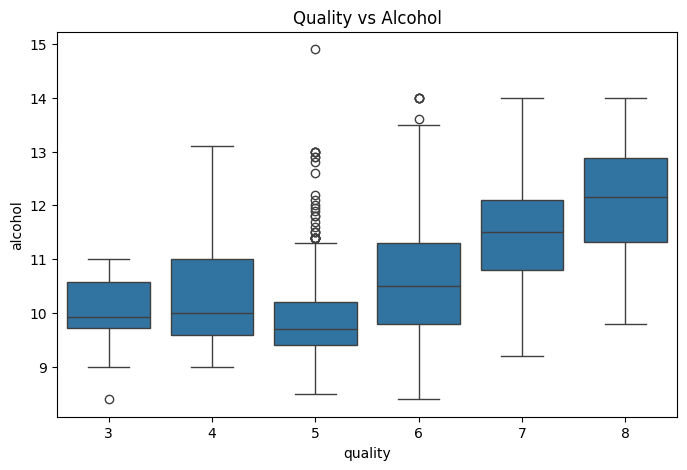

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="quality", y="alcohol", data=df)
plt.title("Quality vs Alcohol")
plt.show()

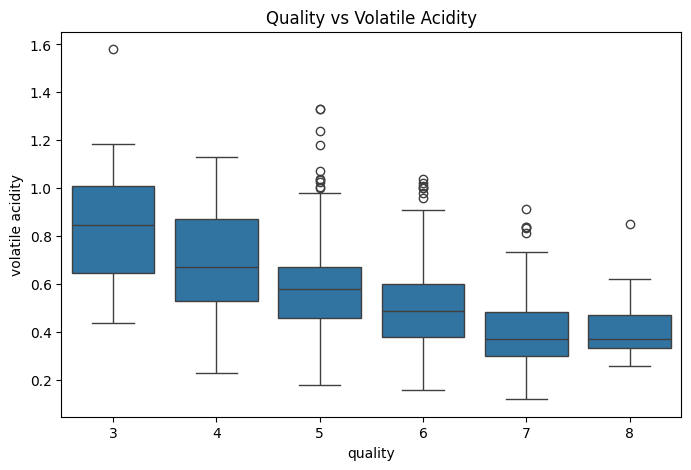

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="quality", y="volatile acidity", data=df)
plt.title("Quality vs Volatile Acidity")
plt.show()

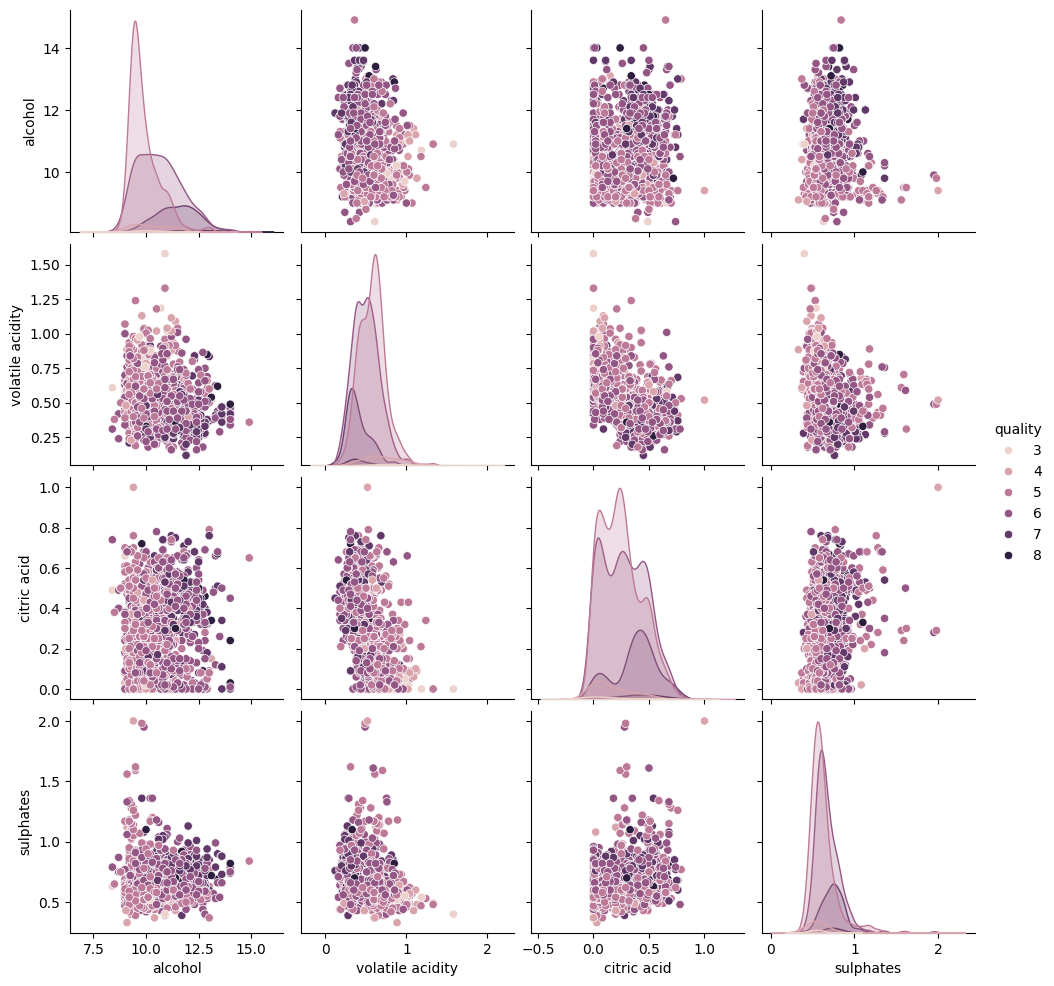

In [ ]:
important_features = ["alcohol", "volatile acidity", "citric acid", "sulphates", "quality"]

sns.pairplot(df[important_features], hue="quality")
plt.show()

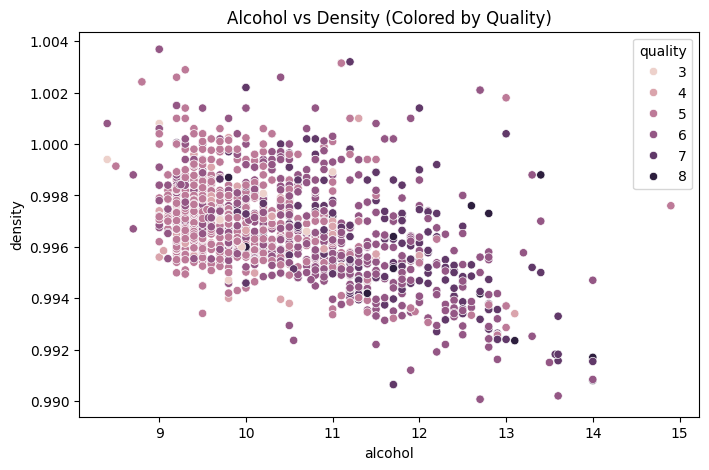

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="alcohol", y="density", hue="quality", data=df)
plt.title("Alcohol vs Density (Colored by Quality)")
plt.show()

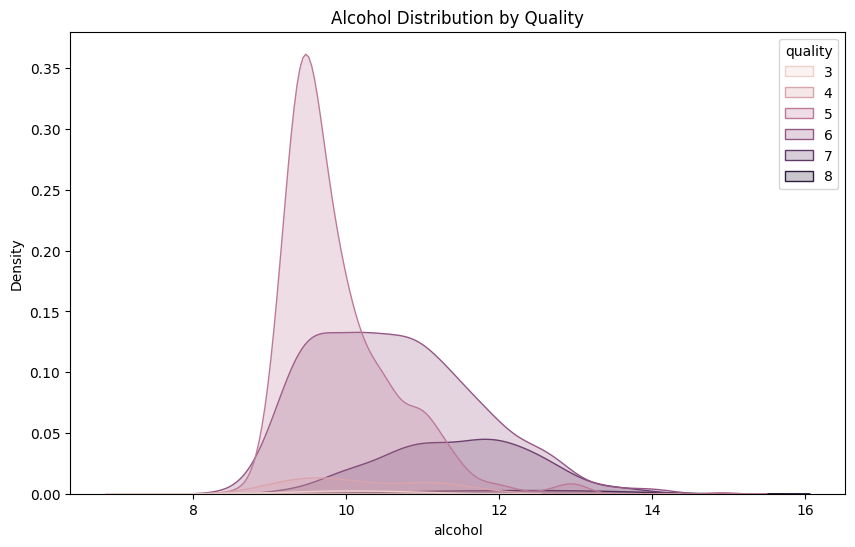

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="alcohol", hue="quality", fill=True)
plt.title("Alcohol Distribution by Quality")
plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_clean.shape

(1179, 12)

In [ ]:
print("Original Data Shape:", df.shape)
print("After Outlier Removal Shape:", df_clean.shape)

Original Data Shape: (1599, 12)
After Outlier Removal Shape: (1179, 12)


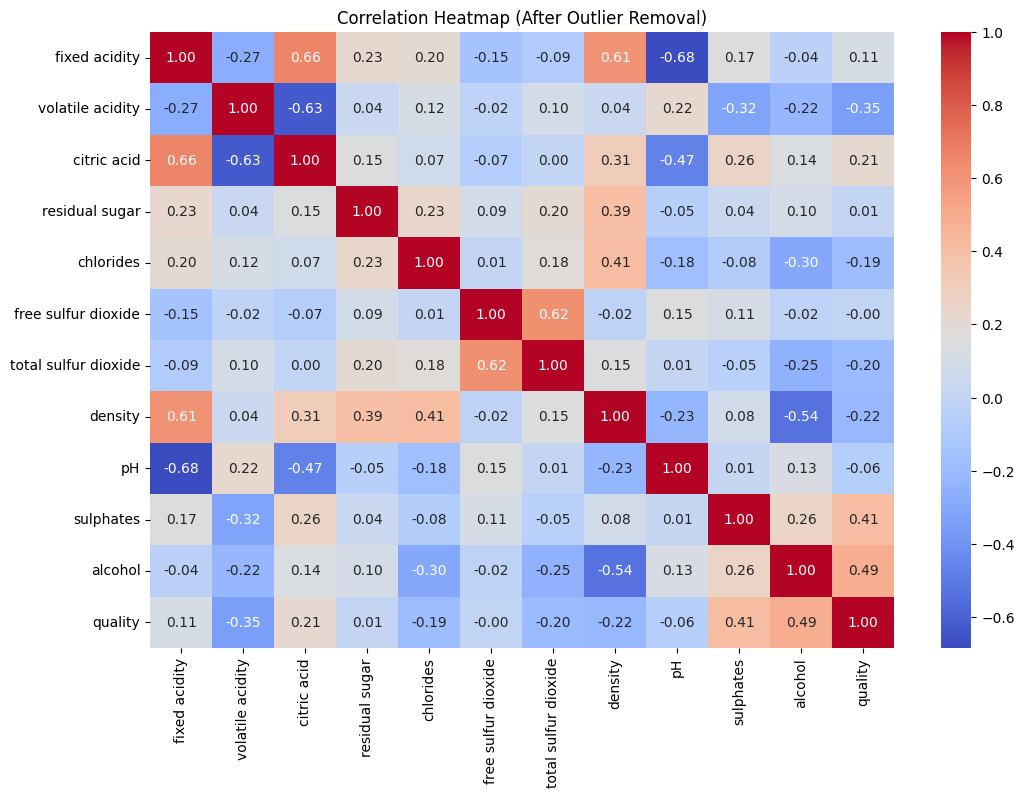

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (After Outlier Removal)")
plt.show()

In [ ]:
print("Top Features Affecting Quality:")
print(df_clean.corr()["quality"].sort_values(ascending=False))w

SyntaxError: invalid syntax (ipython-input-1244273450.py, line 2)

In [ ]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
x=df.drop('quality',axis=1)
y=df['quality']

In [ ]:
model = Sequential()
model.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

model.add(Dense (units = 6, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_6"

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237 (948.00 B)

 Trainable params: 237 (948.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state =123)

In [ ]:
train_X.shape

(1119, 11)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(train_X, train_y, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
mse = model.evaluate(test_X, test_y)
print(f'Test Mean Squared Error: {mse}')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 32.4024 - val_loss: 33.1674
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.7101 - val_loss: 30.7237
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.5388 - val_loss: 20.3227
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.8245 - val_loss: 6.8147
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1205 - val_loss: 5.9963
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3023 - val_loss: 5.3961
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8498 - val_loss: 4.8016
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3616 - val_loss: 4.1676
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7613 - val_loss: 3.6149
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4405 - val_loss: 2.9989
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5827 - val_loss: 2.4942
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0784 -

In [ ]:
predictions = model.predict(test_X)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [ ]:
predictions

array([[6.457473 ],
       [5.3022723],
       [5.216632 ],
       [6.1245527],
       [5.3540006],
       [5.621878 ],
       [6.079084 ],
       [5.5602446],
       [5.617723 ],
       [5.8223104],
       [5.1578937],
       [6.7548623],
       [5.6347795],
       [5.774801 ],
       [5.9669976],
       [6.346219 ],
       [5.146012 ],
       [5.953197 ],
       [5.8564243],
       [5.416627 ],
       [5.7755938],
       [5.6347795],
       [5.7703857],
       [5.31414  ],
       [5.3990135],
       [5.3329425],
       [6.041977 ],
       [5.742053 ],
       [6.0963283],
       [5.7138143],
       [5.0887747],
       [6.236321 ],
       [5.419619 ],
       [5.157215 ],
       [6.1460366],
       [5.073877 ],
       [5.624097 ],
       [6.083693 ],
       [5.432179 ],
       [5.2001524],
       [5.540364 ],
       [5.983705 ],
       [6.167844 ],
       [5.6529355],
       [5.520865 ],
       [5.379176 ],
       [5.6686854],
       [5.124655 ],
       [5.7549043],
       [5.7153544],
